In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
from sklearn.model_selection import LeaveOneOut, cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [2]:
cancer=load_breast_cancer()
x_train, x_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state = 42,train_size=0.5)
model=GaussianNB()
model.fit(x_train,y_train)

c:\users\govind\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


GaussianNB(priors=None)

In [3]:
y_model=model.predict(x_test)
accuracy_score( y_test, y_model)

0.9438596491228071

In [4]:
#Model validation via cross validation 
#Two-fold cross validation
model.fit(x_test,y_test)
y_model=model.predict(x_train)
accuracy_score( y_test[:143], y_model[:143])

0.4965034965034965

In [6]:
#Five fold cross validation 
scores=cross_val_score(model,cancer.data,cancer.target,cv=5)
print(scores)
scores.mean()

[0.92173913 0.92173913 0.95575221 0.94690265 0.95575221]


0.9403770681031165

Text(91.68,0.5,'True Value')

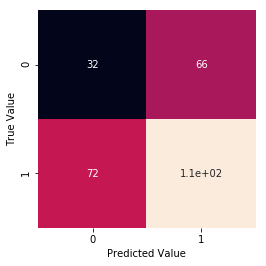

In [8]:
#Confusion matrix for the Gaussian Naive Bayes classifier
mat=confusion_matrix(y_test[:284],y_model)
sns.heatmap(mat,square=True,annot=True,cbar=False)
plt.xlabel("Predicted Value")
plt.ylabel("True Value")